In [ ]:
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# import pandas as pd 


In [3]:
import pandas as pd 
df = pd.read_csv("/Users/anukulchandra/Python With Machine Learning(ES PML 2405 ) /Bank Note Authentication/BankNote_Authentication.csv")
print(df.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
df.shape

(1372, 5)

In [5]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [6]:
x = df.drop('class',axis=1)
y = df['class']

In [7]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(1372, 4) (960, 4) (412, 4)


In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [11]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9975728155339806


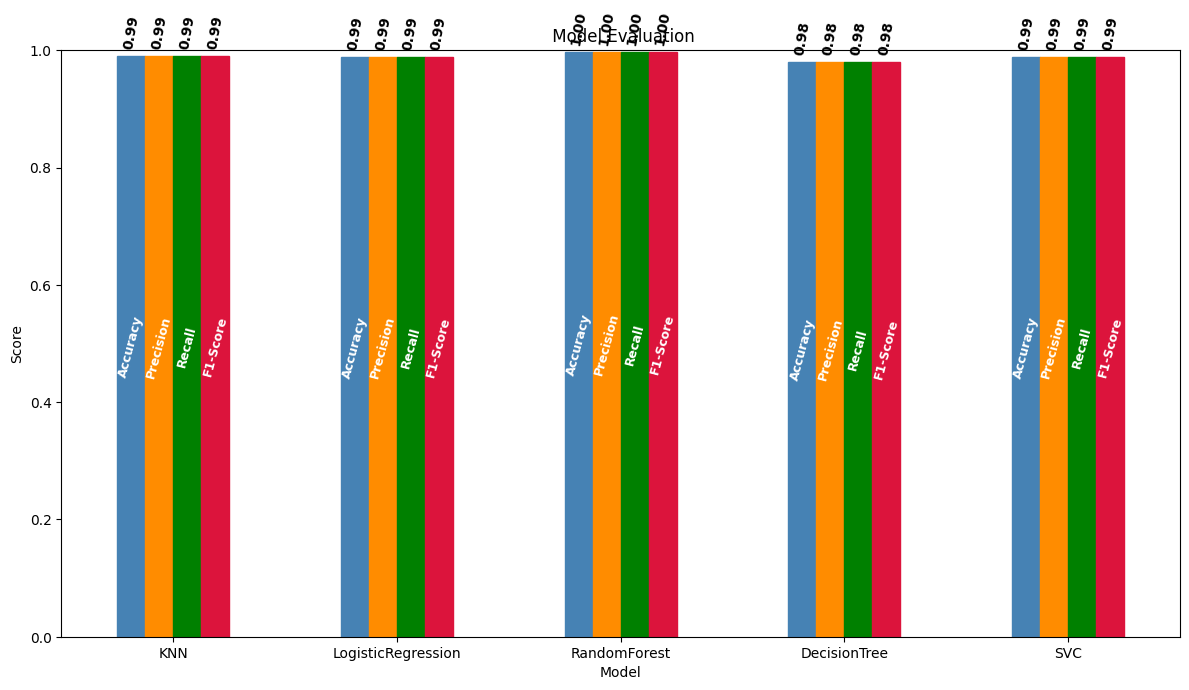

In [13]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=60),
    
    'LogisticRegression': LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(kernel='linear', C=1, random_state=42)

}


results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).set_index('Model')

# Plotting
ax = df_results.plot(kind='bar', figsize=(12,7), legend=False)
plt.title(" Model Evaluation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Bar color mapping to metric names
colors = {
    'Accuracy': 'steelblue',
    'Precision': 'darkorange',
    'Recall': 'green',
    'F1-Score': 'crimson'
}

# Manually set colors to bars + add metric label inside each bar
for bars, metric_name in zip(ax.containers, df_results.columns):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold',rotation =80)
        ax.text(bar.get_x() + bar.get_width() / 2, height / 2, metric_name,
                ha='center', va='center', color='white', fontsize=9, fontweight='bold',rotation =75)
        bar.set_color(colors[metric_name])  # Set custom color

plt.tight_layout()
plt.show()



In [ ]:
#!pip install prettytable
from prettytable import PrettyTable

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add rows from df_results
for model_name, row in df_results.iterrows():
    accuracy = round(row['Accuracy'], 2)
    precision = round(row['Precision'], 2)
    recall = round(row['Recall'], 2)
    f1 = round(row['F1-Score'], 2)

    table.add_row([model_name, accuracy, precision, recall, f1])

print(table)

# best model
best_model = df_results['F1-Score'] &&& df_results['Accuracy'].idxmax()
print("The Best Model :",best_model)


+--------------------+----------+-----------+--------+----------+
|       Model        | Accuracy | Precision | Recall | F1-Score |
+--------------------+----------+-----------+--------+----------+
|        KNN         |   0.99   |    0.99   |  0.99  |   0.99   |
| LogisticRegression |   0.99   |    0.99   |  0.99  |   0.99   |
|    RandomForest    |   1.0    |    1.0    |  1.0   |   1.0    |
|    DecisionTree    |   0.98   |    0.98   |  0.98  |   0.98   |
|        SVC         |   0.99   |    0.99   |  0.99  |   0.99   |
+--------------------+----------+-----------+--------+----------+
The Best Model : RandomForest


In [18]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('KNN', KNeighborsClassifier(n_neighbors=60)),
        ('LogisticRegression', LogisticRegression(penalty='l2', C=10, class_weight='balanced',
                                                  random_state=1, solver='lbfgs', n_jobs=-1)),
        ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('DecisionTree', DecisionTreeClassifier(random_state=42)),
        ('SVC', SVC(kernel='linear', C=1, random_state=42))
    ],
    voting='hard'
)

# Define the pipeline
pipeline = Pipeline([
    ('classifier', voting_clf)
])

# Train the pipeline
pipeline.fit(x_train, y_train)

# Save the pipeline using pickle
with open("final_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)
print("✅ Pipeline trained and saved successfully with pickle!")

# # Load the pipeline
# with open("final_pipeline.pkl", "rb") as f:
#     load_model = pickle.load(f)


✅ Pipeline trained and saved successfully with pickle!
